# Example of nonlinear analysis

In [1]:
import numpy as np
import meshio
import naivefea
from naivefea.constitutive import *
from naivefea.analysis import *

In [2]:
# import a mesh
mesh=meshio.read('abaqus_mesh.inp')

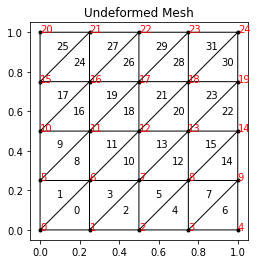

In [3]:
# instantiate fea according to mesh, using one step fea for nonlinear elasticity.
fea=OneStepFea(mesh)
# show the mesh, default plots node index but no element index
fea.plot_mesh(element=True)

In [4]:
material=TensorHookean(10.0,100.0)
material.plane_stress=True

In [5]:
fea.uniform_material(material)
# if use multiprocessor
fea.processor_number=2

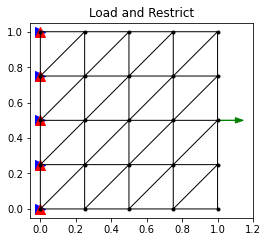

In [6]:
node_fix=[0,5,10,15,20]
f_given={14:(0.001,0)}
fea.set_deform_conditions('fix',Uxy=node_fix)
fea.set_force_conditions(f_given)
fea.plot_restrict()

In [7]:
fea.submit()

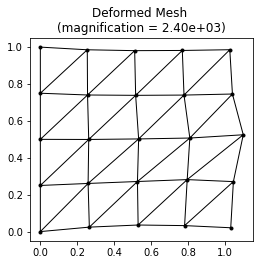

In [8]:
fea.plot('mesh')